In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
path = 'datasets/'
filename = 'Case Study - Agent Analysis - Data.xlsx'

def open_excel(path, filename, sheetname):
    df = pd.read_excel(open(path+filename, 'rb'), sheet_name=sheetname)
    return df

In [4]:
df = open_excel(path,filename,'Data')
df.head()

,Transaction Number,Customer ID,AgentID,Partner,Agent Start Date,Primary Skill,Saves,Sales,Time Spent on Call (Seconds),Expected Life Time Value
0,1246,91123,457896,Partner C,2019-09-20,Saves,1,0,272,201
1,918,90795,3000,Partner C,2019-09-20,Service,1,1,25,367
2,1271,91148,457896,Partner C,2019-09-20,Saves,1,0,259,128
3,915,90792,3000,Partner C,2019-09-20,Service,1,0,54,399
4,1268,91145,457896,Partner C,2019-09-20,Saves,1,0,228,136


In [5]:
def calc_date_dff(d1):
    event_occur = '09/20/2019'
    datex = datetime.strptime(event_occur, '%m/%d/%Y')
    date = datetime.strptime(d1.strftime('%m/%d/%Y'), '%m/%d/%Y')
    day_diff = datex-date
    no_days = day_diff.days
    return no_days
    
df['days_diff'] = df['Agent Start Date'].apply(lambda x: 0 if calc_date_dff(x) >= 0 and calc_date_dff(x) < 30\
                                              else (1 if calc_date_dff(x) >= 30 and calc_date_dff(x) < 90\
                                                   else (2 if calc_date_dff(x) >= 90 else -1)))
df.head()

,Transaction Number,Customer ID,AgentID,Partner,Agent Start Date,Primary Skill,Saves,Sales,Time Spent on Call (Seconds),Expected Life Time Value,days_diff
0,1246,91123,457896,Partner C,2019-09-20,Saves,1,0,272,201,0
1,918,90795,3000,Partner C,2019-09-20,Service,1,1,25,367,0
2,1271,91148,457896,Partner C,2019-09-20,Saves,1,0,259,128,0
3,915,90792,3000,Partner C,2019-09-20,Service,1,0,54,399,0
4,1268,91145,457896,Partner C,2019-09-20,Saves,1,0,228,136,0


In [6]:
save_df = df[['AgentID','Partner','Primary Skill','Saves','Time Spent on Call (Seconds)','Expected Life Time Value ','days_diff']]
save_df

,AgentID,Partner,Primary Skill,Saves,Time Spent on Call (Seconds),Expected Life Time Value,days_diff
0,457896,Partner C,Saves,1,272,201,0
1,3000,Partner C,Service,1,25,367,0
2,457896,Partner C,Saves,1,259,128,0
3,3000,Partner C,Service,1,54,399,0
4,457896,Partner C,Saves,1,228,136,0
...,...,...,...,...,...,...,...
1341,6885,Partner C,Technical Support,1,549,413,2
1342,6885,Partner C,Technical Support,1,343,113,2
1343,6885,Partner C,Technical Support,1,614,300,2
1344,6885,Partner C,Technical Support,1,641,475,2


In [35]:
save_1 = df[['AgentID','Transaction Number','Partner','Primary Skill','Saves','Time Spent on Call (Seconds)','Expected Life Time Value ','days_diff']]


In [44]:
sum_save = save_1.groupby(by=['AgentID', 'Primary Skill','Partner', 'days_diff'])['Saves'].sum().reset_index()
no_call = save_1.groupby(by=['AgentID', 'Primary Skill','Partner', 'days_diff'])['Transaction Number'].count().reset_index()
summary = sum_save.merge(no_call, how='inner',on=['AgentID', 'days_diff', 'Primary Skill', 'Partner'])
summary['save_rate'] = (summary['Saves']/summary['Transaction Number'])*100
summary

,AgentID,Primary Skill,Partner,days_diff,Saves,Transaction Number,save_rate
0,123,Service,Partner A,2,17,27,62.962963
1,456,Service,Partner A,0,23,43,53.488372
2,789,Service,Partner A,2,21,43,48.837209
3,1000,Saves,Partner A,1,73,104,70.192308
4,1500,Saves,Partner C,0,35,58,60.344828
5,1600,Service,Partner A,2,89,153,58.169935
6,2149,Technical Support,Partner C,2,22,36,61.111111
7,2456,Saves,Partner C,2,27,34,79.411765
8,2500,Saves,Partner B,0,19,30,63.333333
9,2600,Service,Partner C,2,36,57,63.157895


<AxesSubplot:xlabel='save_rate', ylabel='Transaction Number'>

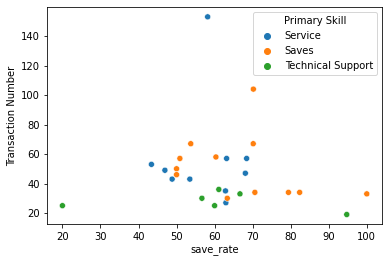

In [45]:
import seaborn as sns
sns.scatterplot(data=summary, x='save_rate', y='Transaction Number', hue= 'Primary Skill')

<AxesSubplot:xlabel='save_rate', ylabel='Transaction Number'>

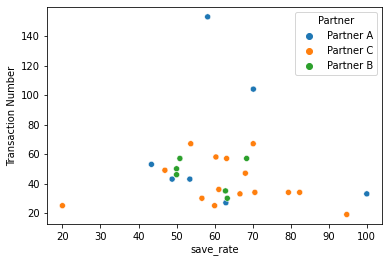

In [50]:
import seaborn as sns
sns.scatterplot(data=summary, x='save_rate', y='Transaction Number', hue= 'Partner')

In [8]:
data = save_df.drop(save_df.iloc[:,:3], axis= 1)
data

,Saves,Time Spent on Call (Seconds),Expected Life Time Value,days_diff
0,1,272,201,0
1,1,25,367,0
2,1,259,128,0
3,1,54,399,0
4,1,228,136,0
...,...,...,...,...
1341,1,549,413,2
1342,1,343,113,2
1343,1,614,300,2
1344,1,641,475,2


In [51]:
partner = pd.get_dummies(save_df.Partner).iloc[:,1:]
skill = pd.get_dummies(save_df['Primary Skill']).iloc[:,1:]

In [52]:
dataset = pd.concat([data,partner,skill], axis=1)
dataset.shape

(1346, 8)

In [53]:
dataset.corr()

,Saves,Time Spent on Call (Seconds),Expected Life Time Value,days_diff,Partner B,Partner C,Service,Technical Support
Saves,1.000000,0.003874,0.523379,0.087271,-0.042137,0.033547,-0.061330,-0.017166
Time Spent on Call (Seconds),0.003874,1.000000,0.020304,0.077578,-0.015104,0.018340,0.042420,0.087295
Expected Life Time Value,0.523379,0.020304,1.000000,0.097746,-0.065612,0.013294,0.027701,0.028632
days_diff,0.087271,0.077578,0.097746,1.000000,-0.035709,0.080444,0.200325,0.180221
Partner B,-0.042137,-0.015104,-0.065612,-0.035709,1.000000,-0.464783,-0.086755,-0.191361
Partner C,0.033547,0.018340,0.013294,0.080444,-0.464783,1.000000,-0.316475,0.411721
Service,-0.061330,0.042420,0.027701,0.200325,-0.086755,-0.316475,1.000000,-0.320714
Technical Support,-0.017166,0.087295,0.028632,0.180221,-0.191361,0.411721,-0.320714,1.000000


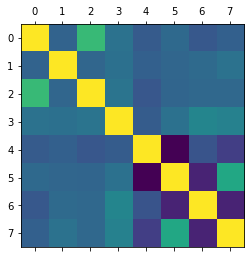

In [54]:
plt.matshow(dataset.corr())
plt.show()

<AxesSubplot:>

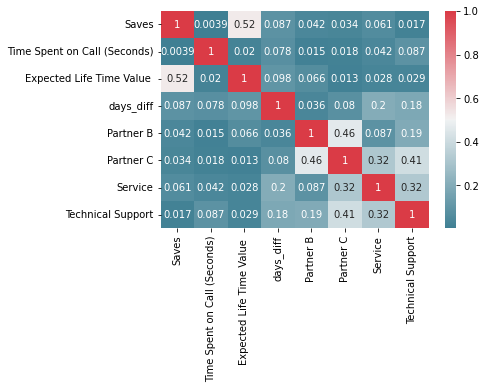

In [59]:
corr = dataset.corr().abs()
sns.heatmap(corr,  cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [61]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[]

In [13]:
X =  dataset.drop(['Saves'], axis=1)
y = dataset['Saves']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# RandomForest

In [15]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

In [16]:
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.83      0.58      0.68       111
           1       0.76      0.92      0.83       159

    accuracy                           0.78       270
   macro avg       0.79      0.75      0.76       270
weighted avg       0.79      0.78      0.77       270

0.7777777777777778


<AxesSubplot:>

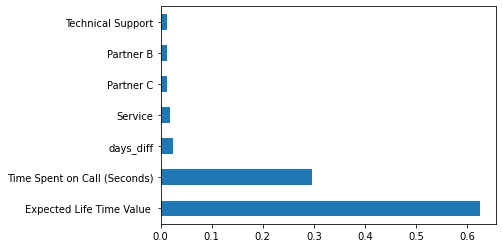

In [17]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# ADD AGENTID

In [18]:
agent = pd.get_dummies(save_df.AgentID).iloc[:,1:]

In [19]:
dff = pd.concat([dataset,agent], axis=1)
dff.shape

(1346, 35)

In [20]:
X =  dff.drop(['Saves'], axis=1)
y = dff['Saves']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)



In [22]:
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68       111
           1       0.76      0.90      0.82       159

    accuracy                           0.77       270
   macro avg       0.78      0.75      0.75       270
weighted avg       0.78      0.77      0.77       270

0.774074074074074


<AxesSubplot:>

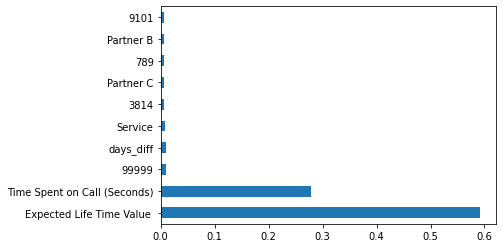

In [23]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# XGBoost

In [25]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

[16:46:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.774074074074074


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))

0.7666666666666667


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Random Forest using RandomCV

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_c=RandomForestClassifier()

In [28]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [31]:
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(X_train,y_train)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(X_test)
print(accuracy_score(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91, total=   1.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91, total=   1.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91, total=   1.6s
[CV] n_estimators=400, min_samples_split

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   36.4s finished


0.8


In [33]:
print(confusion_matrix(y_test,prediction_cv))

[[ 60  51]
 [  3 156]]


In [66]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [72]:
models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=30),
    RandomForestClassifier(n_estimators=100)
]

In [73]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

for model in models:
    score_model(X, y, model)

SVC: 0.7588750576302444
NuSVC: 0.8524080787156915
LinearSVC: 0.9849488260084287
SGDClassifier: 0.9618768328445748
KNeighborsClassifier: 0.7924764890282132


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

LogisticRegression: 0.8928765633496466


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

LogisticRegressionCV: 0.8524080787156915
BaggingClassifier: 0.9849306811332127
ExtraTreesClassifier: 1.0
RandomForestClassifier: 1.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


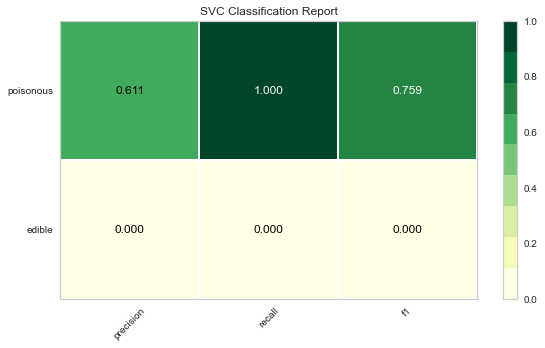

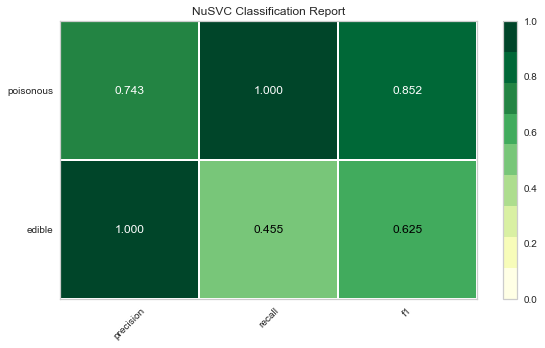

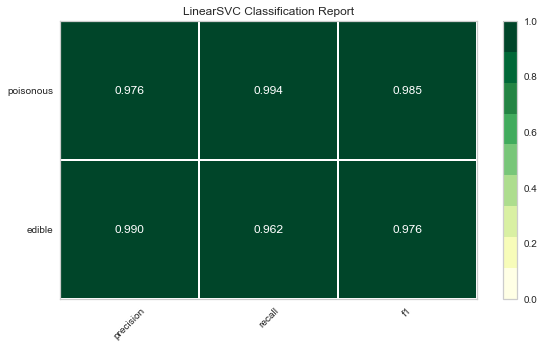

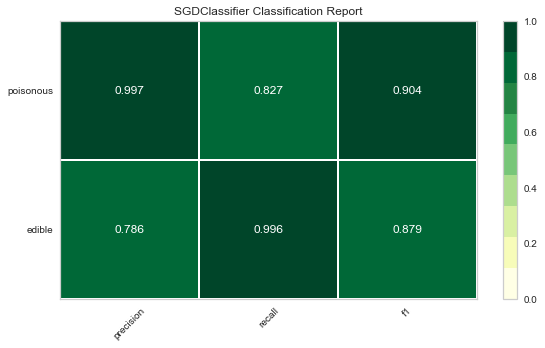

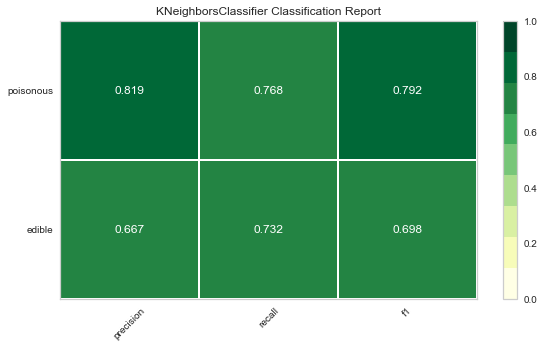

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


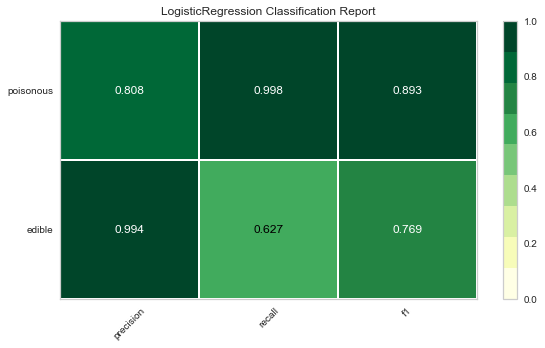

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

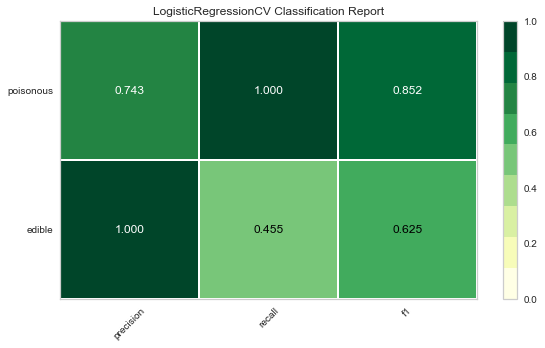

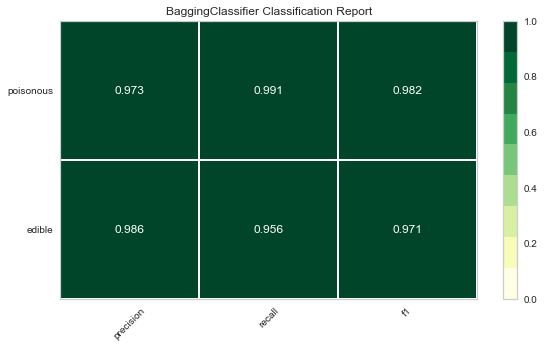

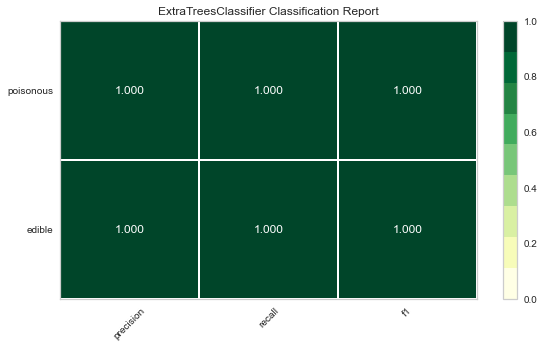

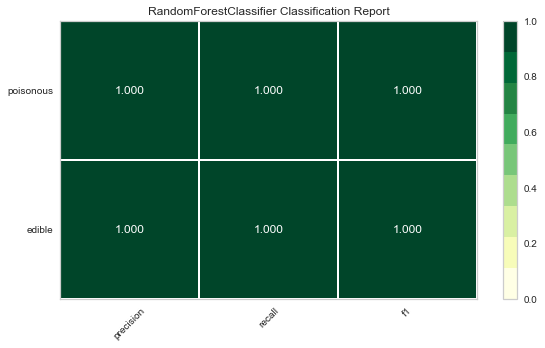

In [69]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['edible', 'poisonous'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

for model in models:
    visualize_model(X, y, model)

In [77]:

from sklearn.metrics import plot_roc_curve

# classifiers = [log_reg, decision_tree, decision_forest]
# ax = plt.gca()
# for i in models:
plot_roc_curve(RandomForestClassifier(), X_test, y_test, ax=ax)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [85]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print( f1_score(expected, predicted))
#     return estimator.__class__.__name__, f1_score(expected, predicted)

for model in models:
    score_model(X, y, model)

0.7588750576302444
0.8524080787156915


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9849488260084287
0.8673539518900344
0.7924764890282132


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

0.8928765633496466


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

0.8524080787156915
0.9825616355983163
1.0
1.0


In [78]:
for model in models:
    print(model)

SVC(gamma='auto')
NuSVC(gamma='auto')
LinearSVC()
SGDClassifier(max_iter=100)
KNeighborsClassifier()
LogisticRegression()
LogisticRegressionCV(cv=3)
BaggingClassifier()
ExtraTreesClassifier(n_estimators=30)
RandomForestClassifier()
